In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt

READ TWO DATASET AS TRAINING AND TESTING SETS

In [3]:
train_data = pd.read_csv("/content/p1_test (1).csv",names=["f1", "f2", "target"])
test_data = pd.read_csv("/content/p1_train (1).csv",names=["f1", "f2", "target"])

ASSIGNING VALUES OF COLUMNS OF DATAFRAME FOR PLOTTING

In [4]:
#Training datasets
X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]
#X_train:This selects all the rows and all columns except the last one from train_data.It represents the feature variables used to train the model.
#iloc[:, :-1]:This uses slicing to get all columns up to but not including the last one.
#y_train:This selects all the rows and only the last column from train_data,which represents the target variable for training.
#iloc[:, -1]:This selects the last column, which is typically the labels or target outcomes for the dataset.
#Testing datasets
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]
#X_test: This selects all rows and all columns except the last one from test_data. It represents the feature variables for testing the model's performance.
#y_test: This selects all rows and only the last column from test_data, which is the target variable used to evaluate the model's predictions.

STANDARDIZING THEM TO SUIT WITH ML MODELS

In [5]:
#Using StandardScalar,the Features are Preprocessed
sc = StandardScaler()
#StandardScaler(): This creates an instance of StandardScaler, which will standardize the features by removing the mean and scaling them to unit variance.
#It transforms the data such that each feature will have a mean of 0 and a standard deviation of 1.
#Standardization is important when the features have different scales, which can negatively affect the performance of many machine learning algorithms.
X_train = sc.fit_transform(X_train)
#sc.fit_transform(X_train): This applies two steps:
#fit(): Calculates the mean and standard deviation for each feature in the training data X_train.
#transform(): Uses these calculated values to scale and transform the X_train data, so that each feature has a mean of 0 and a variance of 1.
X_test = sc.transform(X_test)
#sc.transform(X_test): This transforms the test data X_test using the mean and standard deviation calculated from the training data (i.e., it uses the parameters learned from fit_transform on X_train).
#It ensures that the test data is scaled in the same way as the training data.

In [6]:
#EVALUATION OF LINEAR REGRESSION MODELS
def linear_models(model):#model: This is a parameter that represents a linear regression model
    mod=model.fit(X_train,y_train)
    y_pred=mod.predict(X_test)
    #model.fit(X_train, y_train): Trains the linear regression model using the training data (X_train for features and y_train for target values).
    #fit method adjusts the model parameters to minimize the error on the training data.
    #mod now represents the trained model.
    #mod.predict(X_test): Uses the trained model to predict target values for the test data (X_test).
    #y_pred contains the predicted values for the test set.
    mse = mean_squared_error(y_test,y_pred)
    mae= mean_absolute_error(y_test,y_pred)
    #mean_squared_error(y_test, y_pred): Calculates the Mean Squared Error (MSE) between the true target values (y_test) and the predicted values (y_pred).
    #MSE: Measures the average squared difference between the predicted and actual values. Lower values indicate better model performance.
    #mean_absolute_error(y_test, y_pred): Calculates the Mean Absolute Error (MAE) between the true target values and the predicted values.
    #MAE: Measures the average absolute difference between the predicted and actual values. Like MSE, lower values indicate better model performance, but MAE is less sensitive to outliers.
    return mse,mae#The function returns the calculated Mean Squared Error and Mean Absolute Error for the given model.

PRINTING OF EVALUATION METRICS


In [7]:
#List of MAE and MSE for plotting graph
MSE=[]
MAE=[]
#MSE: A list to store the Mean Squared Error values for each model.
#MAE: A list to store the Mean Absolute Error values for each model.
#Model list
model_list=[SVR(kernel="linear",C=1.0),LinearRegression()]
model_name_list=["Support Vector Regression","Linear Regression"]
#model_list: Contains the models to be evaluated.
#SVR(kernel="linear", C=1.0): Support Vector Regression with a linear kernel.
#LinearRegression(): A standard linear regression model.
#model_name_list: Contains the corresponding names of the models for display purposes.
print("                                    Evaluation Metrics")
#Prints a header to indicate the start of the evaluation metrics output.
for model,model_name in zip(model_list,model_name_list):
    mse,mae=linear_models(model)
    MSE.append(mse)
    MAE.append(mae)
    print(f"{model_name}:")
    print("   Mean Squared Error=",round(mse,3))
    print("   Mean Absolute Error=",round(mae,3))
    print("-------------------------------------------------------------------------------------------------------------------------")
    #zip(model_list, model_name_list): Pairs each model with its corresponding name for iteration.
#linear_models(model): Calls the linear_models function (defined previously) for each model, which returns MSE and MAE.
#MSE.append(mse): Adds the Mean Squared Error for the current model to the MSE list.
#MAE.append(mae): Adds the Mean Absolute Error for the current model to the MAE list.
#print(f"{model_name}:"): Prints the name of the model.
#print(" Mean Squared Error=", round(mse, 3)): Prints the MSE value rounded to 3 decimal places.
#print(" Mean Absolute Error=", round(mae, 3)): Prints the MAE value rounded to 3 decimal places.
#print("-------------------------------------------------------------------------------------------------------------------------"): Prints a line separator for readability.

                                    Evaluation Metrics
Support Vector Regression:
   Mean Squared Error= 5.068
   Mean Absolute Error= 1.793
-------------------------------------------------------------------------------------------------------------------------
Linear Regression:
   Mean Squared Error= 5.07
   Mean Absolute Error= 1.794
-------------------------------------------------------------------------------------------------------------------------


PLOTTING OF EVALUATION METRICS

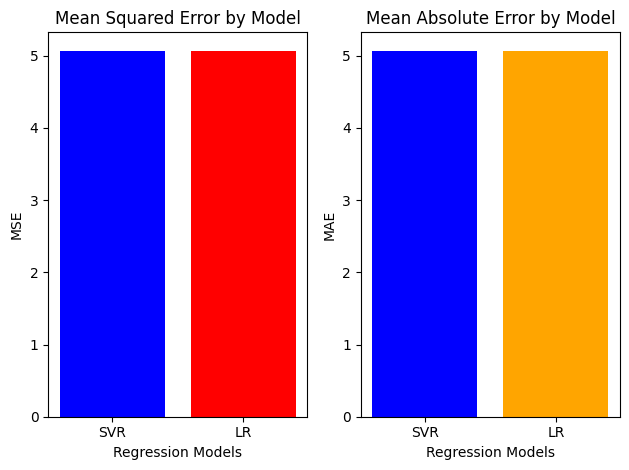

In [11]:
#MSE graph
plt.subplot(1,2,1)
#plt.subplot(1, 2, 1): This sets up the first subplot in a grid of 1 row and 2 columns (i.e., 1x2 layout).
The 1 indicates the first subplot in this grid.
plt.bar(["SVR","LR"],MSE,color=['blue','red'])
plt.title("Mean Squared Error by Model")
plt.xlabel("Regression Models")
plt.ylabel("MSE")
#plt.bar(["SVR", "LR"], MSE, color=['blue', 'red']): Creates a bar chart with model names on the x-axis and MSE values on the y-axis.
#["SVR", "LR"]: Labels for the x-axis representing the two models.
#MSE: Values for the MSE of the models.
#color=['blue', 'red']: Colors the bars for SVR and LR in blue and red, respectively.
#plt.title("Mean Squared Error by Model"): Sets the title for this subplot.
#plt.xlabel("Regression Models"): Labels the x-axis.
#plt.ylabel("MSE"): Labels the y-axis.
#MAE graph
plt.subplot(1,2,2)
plt.bar(["SVR","LR"],MSE,color=['blue','orange'])
plt.title("Mean Absolute Error by Model")
plt.xlabel("Regression Models")
plt.ylabel("MAE")
#plt.subplot(1, 2, 2): This sets up the second subplot in the 1x2 grid.
#plt.bar(["SVR", "LR"], MAE, color=['blue', 'orange']): Creates a bar chart similar to the first, but for MAE values.
#["SVR", "LR"]: Labels for the x-axis.
#MAE: Values for the MAE of the models.
#color=['blue', 'orange']: Colors the bars in blue and orange, respectively.
#plt.title("Mean Absolute Error by Model"): Sets the title for this subplot.
#plt.xlabel("Regression Models"): Labels the x-axis.
#plt.ylabel("MAE"): Labels the y-axis.
plt.tight_layout()
plt.show()
#plt.tight_layout(): Adjusts the spacing between subplots to fit them nicely within the figure area, avoiding overlap of elements.
#plt.show(): Displays the plot.